#**Unsupervised Machine Learning**
##KNN Clustering

###Importing libraries and reading the data

In [ ]:
#import necssary libraries

#Pandas for working with series or matrix data with row and column labels
import pandas as pd

#sklearn libraries
from sklearn.preprocessing import MinMaxScaler #for scaling
from sklearn.cluster import KMeans #for clustering
from sklearn.metrics import silhouette_score

#for scraping
from bs4 import BeautifulSoup
import requests
import re
!pip install --upgrade beautifulsoup4

#for plotting, visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 10.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#read the csv file
url = "https://drive.google.com/file/d/1BDOhq8ue_K_4X-9FWxp9NO8jdizBwgzy/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
songs_df_raw = pd.read_csv(path)

###**Cleaning the data**

In [ ]:
#dealing with the duplicates
df = songs_df_raw.copy()

In [ ]:
df.duplicated().sum()

60

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#striping spaces of the columns' names
df.columns

Index(['name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.replace(" ", "")

In [ ]:
#dropping obsolit features(columns)
df.drop(['key', 'mode', 'type', 'liveness', 'duration_ms', 'time_signature', 'id', 'html'], axis=1, inplace=True)

In [ ]:
#to not drop chategorial column we set them as a compound index
df = df.set_index(['name', 'artist'])

In [ ]:
#checking the data for outliers to choose the apt scaller
df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
count,5175.000000,5175.000000,5175.000000,5175.000000,5175.000000,5175.000000,5175.000000,5175.000000
mean,0.507690,0.653314,-9.374001,0.083139,0.291109,0.260125,0.442405,118.665614
std,0.218088,0.289361,6.314586,0.071116,0.356780,0.371780,0.277884,28.580127
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.306000,0.476000,-11.378000,0.038900,0.002320,0.000001,0.195000,96.083500
50%,0.536000,0.738000,-7.358000,0.055600,0.095900,0.002190,0.415000,119.044000
75%,0.686500,0.894500,-5.294500,0.098800,0.570000,0.654500,0.676000,134.039500
max,0.967000,1.000000,1.342000,0.918000,0.996000,0.985000,0.985000,213.990000


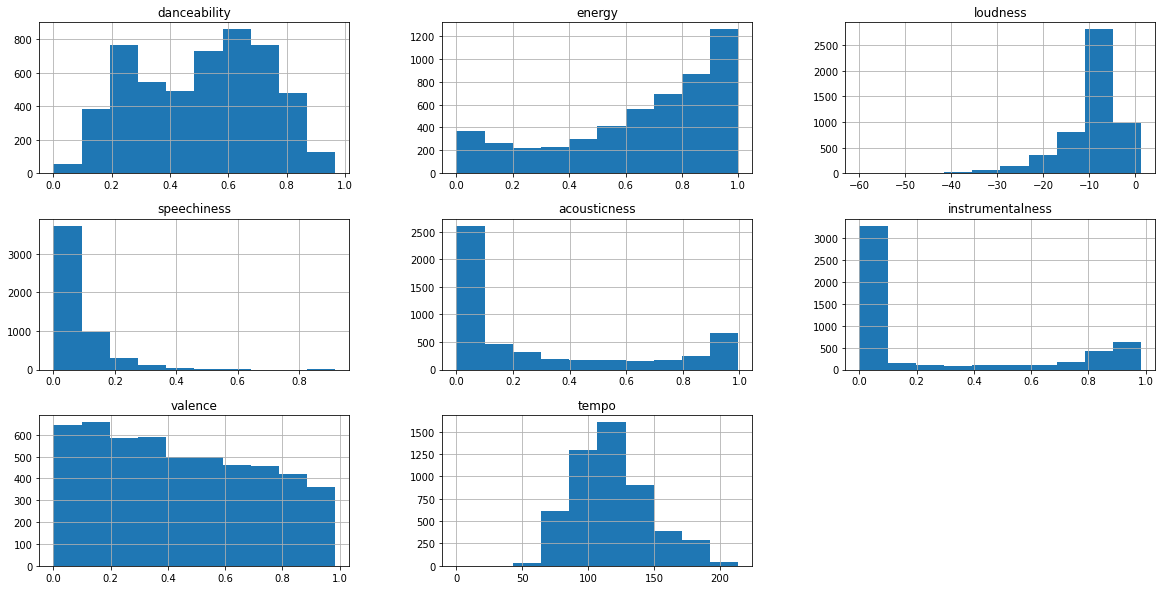

In [ ]:
#plotting the data to check their distribution
df.hist(figsize=(20,10));

In [ ]:
#the bulk of the data are within normal distribution, so we can apply MinMaxScaler
songs_df = MinMaxScaler().fit_transform(df) #initiating the scaler, calculating the min&max of the data, transforming the data with the scaller
pd.DataFrame(songs_df, columns=df.columns, index=df.index) #Scikit-Learn returns data as a Numpy arrays, so we need to convert them back to a DataFrame

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
name,artist,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.25900,0.763897,0.076797,0.696787,0.000060,0.310660,0.515800
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.39900,0.771967,0.037691,0.217871,0.000002,0.703553,0.584322
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.73000,0.798018,0.377996,0.454819,0.000064,0.918782,0.437862
Mulher Eu Sei,Chico César,0.729059,0.05020,0.682811,0.051307,0.882530,0.000041,0.531980,0.499098
Rosa Morena,Kurt Elling,0.673216,0.11900,0.655228,0.041394,0.919679,0.000348,0.408122,0.565171
...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.208893,0.06940,0.596818,0.051525,0.920683,0.725888,0.066497,0.410795
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.194416,0.10100,0.621548,0.048148,0.858434,0.432487,0.036041,0.388495
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.061634,0.00093,0.277803,0.047277,0.954819,0.983756,0.034924,0.334469


###**Clustering with KNN**
###Searching the K-value


###Inertia

In [ ]:
inercia_scores = []

for i in range(20, 200, 5): #range for the probable K-value
    my_kmeans_model = KMeans(n_clusters=i, random_state=3).fit(songs_df)
    predictions = my_kmeans_model.predict(songs_df)
    inercia_scores.append(my_kmeans_model.inertia_)

inercia_scores

[370.3122930439314,
 336.905061252244,
 316.1153935853656,
 297.36994006223347,
 282.7353543901308,
 269.432066601132,
 258.2646769188504,
 248.5742868229246,
 239.6221162777064,
 232.4661513970035,
 225.70720968149683,
 219.66477791672713,
 214.17968943794529,
 209.48045926048007,
 203.16003721528728,
 199.0942236062147,
 192.9165952195495,
 189.64719185531425,
 186.95053195807662,
 182.80188966363073,
 179.51641874324218,
 176.1372265957325,
 172.86328060649495,
 169.88077072589607,
 167.56794811258436,
 164.49033524743743,
 162.0117270038582,
 159.00618162169175,
 156.49994731878508,
 154.13385257890408,
 152.34526634876937,
 150.93456860094614,
 149.16001661531996,
 147.3540934470064,
 145.5736250797699,
 143.83162617003123]

[Text(0, 0.5, 'Inertia'), Text(0.5, 0, 'Cluster Size')]

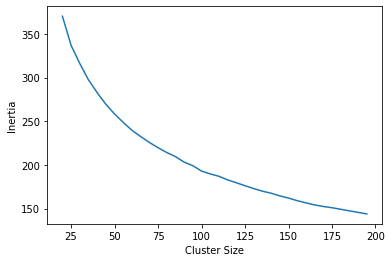

In [ ]:
# Visualization of different cluster size performations
pd.DataFrame(inercia_scores, index=range(20, 200, 5)).plot(legend=False).set(xlabel="Cluster Size", ylabel="Inertia")

###Silhouette coefficient


In [ ]:
#silhouette coefficient
sil_scores = [] 
for i in range(20,200, 5):
    km = KMeans(n_clusters= i, random_state=3)
    km.fit(songs_df)
    sil_scores.append(silhouette_score(songs_df, km.labels_))

sil_scores

[0.19188893432765486,
 0.18588807032805355,
 0.18084286238428782,
 0.17189422789808032,
 0.16773483219416038,
 0.1715030013805346,
 0.16363144009669892,
 0.1552417264675216,
 0.16185769940006087,
 0.16222865704468797,
 0.1591330953737809,
 0.15077705734861238,
 0.15392771701945948,
 0.15101479367135776,
 0.15126844229392458,
 0.15003903655657197,
 0.15207169534076884,
 0.1540547333099089,
 0.14670898760176992,
 0.15083331216422236,
 0.14988581542337853,
 0.14703778355636699,
 0.14801417908224346,
 0.1495295922346049,
 0.15063530744861275,
 0.15196563942450583,
 0.1494920156430094,
 0.14818440851542755,
 0.1518731645835653,
 0.15097833924505863,
 0.150464550993388,
 0.14873016865205052,
 0.1484392018107885,
 0.14711393659414218,
 0.1481069475990419,
 0.1471976166237611]

[Text(0, 0.5, 'Silhouette score'), Text(0.5, 0, 'Cluster Size')]

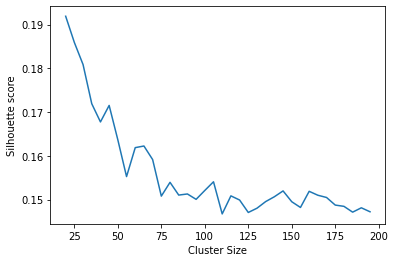

In [ ]:
#Visualization of different number of clusters silhouette
pd.DataFrame(sil_scores, index=range(20, 200, 5)).plot(legend=False).set(xlabel="Cluster Size", ylabel="Silhouette score")

###Clustering

In [ ]:
my_KNN = KMeans(n_clusters= 60, random_state=3)
my_KNN.fit(songs_df)
my_clusters = my_KNN.predict(songs_df)
songs_cl_df = pd.DataFrame(data=songs_df, columns=df.columns, index=df.index)
songs_cl_df["cluster"] = my_clusters
songs_cl_df.head(15)

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,cluster
name,artist,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.2590,0.763897,0.076797,0.696787,0.000060,0.310660,0.515800,39
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.3990,0.771967,0.037691,0.217871,0.000002,0.703553,0.584322,29
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.7300,0.798018,0.377996,0.454819,0.000064,0.918782,0.437862,46
Mulher Eu Sei,Chico César,0.729059,0.0502,0.682811,0.051307,0.882530,0.000041,0.531980,0.499098,4
Rosa Morena,Kurt Elling,0.673216,0.1190,0.655228,0.041394,0.919679,0.000348,0.408122,0.565171,56
Desafinado,Stan Getz,0.481903,0.1460,0.692837,0.070697,0.934739,0.156345,0.429442,0.667718,56
Madalena,Maria Gasolina,0.698035,0.2070,0.752828,0.059368,0.966867,0.420305,0.694416,0.437081,4
O Meu Amor É Glòria,Sílvia Pérez Cruz,0.521200,0.7330,0.803365,0.423747,0.698795,0.000057,0.899492,0.451259,41
Brigas Nunca Mais,Paula Morelenbaum,0.717684,0.5460,0.791432,0.043573,0.399598,0.077157,0.650761,0.794579,44


###**Analysing the clusters**

In [ ]:
#pick a cluster
cluster_n = songs_cl_df.loc[songs_cl_df['cluster'] == 38]
len(cluster_n)

91

Text(0.5, 0, 'speechiness')

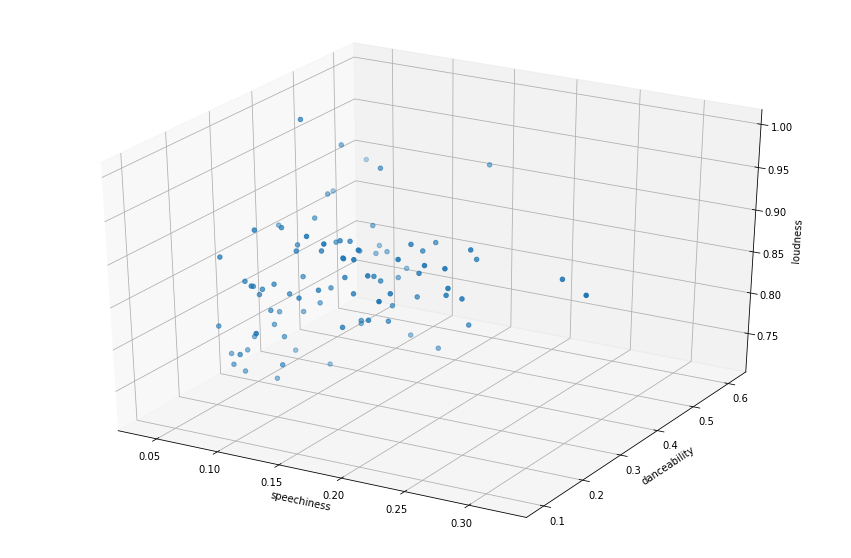

In [ ]:
#ploting 3D chart 
Y = cluster_n.loc[:, ['danceability', 'loudness', 'speechiness']]

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111,  projection = '3d')

y = Y['danceability']
z = Y['loudness']
x = Y['speechiness']

ax.scatter(x, y, z)
ax.set_ylabel('danceability')
ax.set_zlabel('loudness')
ax.set_xlabel('speechiness')

###Scraping genres

In [ ]:
#selecting authors to get their genres
cluster_n_artist = cluster_n.reset_index()
cluster_n_artist["artist"]


pandas.core.series.Series

In [ ]:
#scrapping
genres = []
prefix = "https://en.wikipedia.org/wiki/"
for i in (cluster_n_artist["artist"]):
  try:
    link = prefix+i.strip().replace(" ", "_")
    response = requests.get(link)
    soup = BeautifulSoup(response.content, "html.parser")
    a = soup.find(text="Genres").findNext('td').get_text()
    #a = soup.find_all("body")[0].find_all("td")[2].find("a")["title"]
    genres.append(a)
  except:
    continue

genres_df = pd.DataFrame(genres, columns =["genres"])
genres_df

,genres
0,\nAbstract\nAerial\nAircraft\nArchitectural\nA...
1,Indie popjangle popalternative rock[1]Britpop[...
2,Thrash metal
3,Progressive house[3]big room house[4]Dutch hou...
4,Electro housebig room housefuture bouncefuture...
5,Progressive house[3]big room house[4]Dutch hou...
6,Progressive house[3]big room house[4]Dutch hou...
7,\nElectropop\nhouse\nnu-disco\n
8,Death metal
9,Blackened death metal[1]


In [ ]:
genres1 = genres_df.copy()

In [ ]:
#cleaning
for i in range(len(genres1["genres"])):
  if len(genres1.genres[i])>65:
    genres1.genres[i] = 0
  else:
    continue 

df1 = genres1[genres1.genres != 0]

df1

,genres
1,Indie popjangle popalternative rock[1]Britpop[...
2,Thrash metal
7,\nElectropop\nhouse\nnu-disco\n
8,Death metal
9,Blackened death metal[1]
10,"Melodic death metal, progressive death metal, ..."
11,Death metal
12,Technical death metal[1]
13,"Melodic death metal, progressive death metal, ..."
14,"Melodic death metal, death metal"


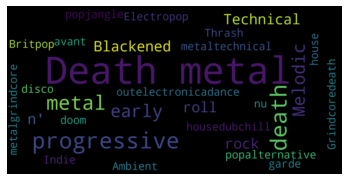

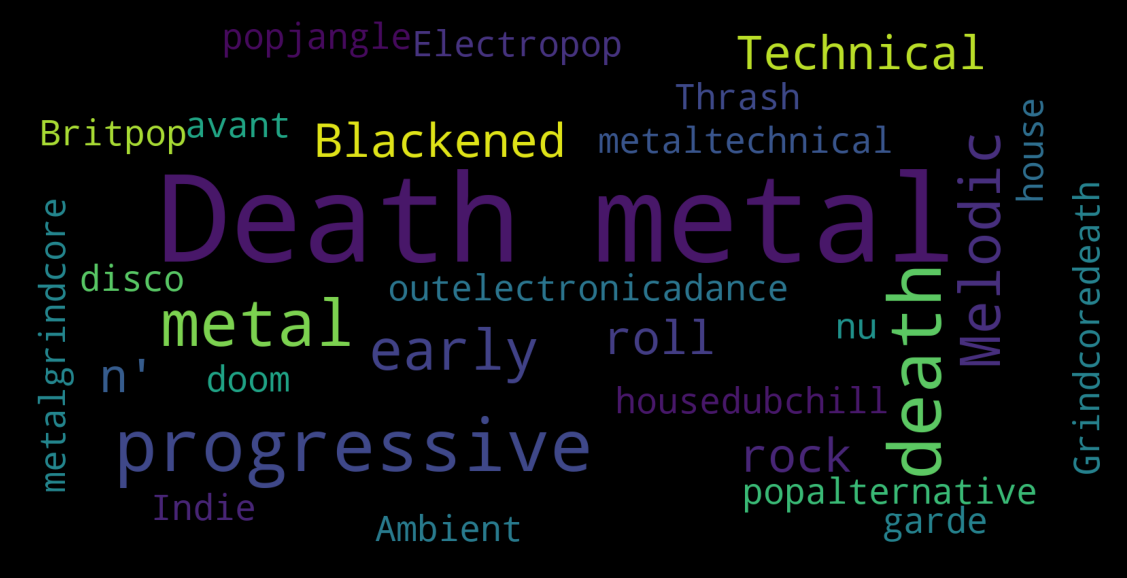

In [ ]:
#Create and generate a word cloud image:
text = df1["genres"].str.cat(sep = " ")
wordcloud = WordCloud(width=1600, height=800).generate(text)


#Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure( figsize=(20,10), facecolor='k');
plt.imshow(wordcloud);
#plt.tight_layout(pad=0)
#plt.show();
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

In [74]:
df2 = songs_cl_df.copy()
df2["cluster"] = df2["cluster"].replace([0, 38], ["Sunday Morning", "Messy day"])
df2

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,cluster
name,artist,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.25900,0.763897,0.076797,0.696787,0.000060,0.310660,0.515800,39
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.39900,0.771967,0.037691,0.217871,0.000002,0.703553,0.584322,29
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.73000,0.798018,0.377996,0.454819,0.000064,0.918782,0.437862,46
Mulher Eu Sei,Chico César,0.729059,0.05020,0.682811,0.051307,0.882530,0.000041,0.531980,0.499098,4
Rosa Morena,Kurt Elling,0.673216,0.11900,0.655228,0.041394,0.919679,0.000348,0.408122,0.565171,56
...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.208893,0.06940,0.596818,0.051525,0.920683,0.725888,0.066497,0.410795,57
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.194416,0.10100,0.621548,0.048148,0.858434,0.432487,0.036041,0.388495,57
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.061634,0.00093,0.277803,0.047277,0.954819,0.983756,0.034924,0.334469,9
